# PCA 

### 451-463

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

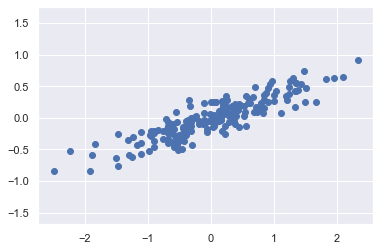

In [13]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');


finding a list of
the principal axes in the data, and using those axes to describe the dataset

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the “components” and
“explained variance”

In [15]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [16]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let’s visualize them as vectors over the input data,
using:

•the “components” to define the direction of the vector, 

•the “explained variance” to define the squared-length of the vector 

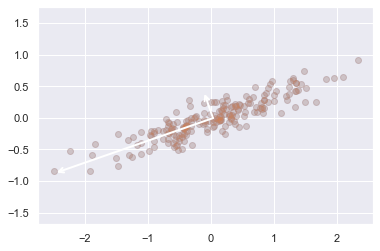

In [17]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
 # plot data
    plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');


These vectors represent the **principal axes of the data**, and the **length** shown in is an indication of **how “important” that axis is in describing the distribution of the data**—more precisely, it is a **measure of the variance of the data when pro‐
jected onto that axis**.

This transformation from **data axes to principal axes** is as an **affine transformation**, which basically means it is **composed of a translation, rotation, and uniform scaling

# PCA as dimensionality reduction

 Using PCA for dimensionality reduction involves **zeroing out one or more of the smallest principal components**, resulting in a lower-dimensional projection of the data that preserves the maximal data variance

### an example of using PCA as a dimensionality reduction transform

In [18]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a **single dimension**
we perform the **inverse transform of this reduced data** and plot it along with the original data

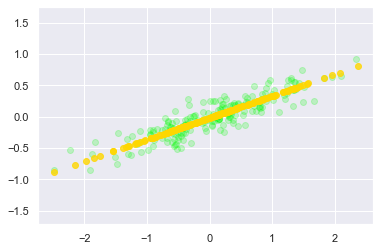

In [19]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2,c='lime')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8,c='gold')
plt.axis('equal');

-> PCA dimensionality reduction means: the information along **the least important principal axis** or axes **is removed**,
**leaving only the component(s) of the data with the highest variance**. 
The fraction of variance that is cut out (proportional to the spread of points about the line) is roughly a measure of how much “information” is discarded in this reduction of dimensionality.


# PCA for visualization: Handwritten digits

## with the digits data

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when we look at high-dimensional data

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape


(1797, 64)

the data consists of 8×8 pixel images, meaning that they are 64- dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [21]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


we plot the first two principal components of each point to learn about the data

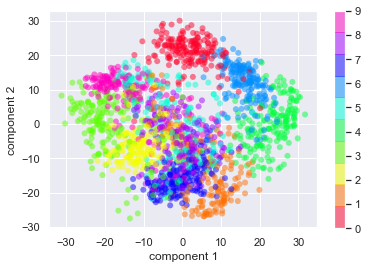

In [28]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolors='none',alpha=0.5,cmap=plt.cm.get_cmap('gist_rainbow',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


Recall what these components mean: *the full data is a 64-dimensional point cloud*,and **these points are the projection of each data point along the directions with the
largest variance**. 
Essentially, we have found **the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions**, and
have done this **in an unsupervised manner**—that is, without reference to the labels.


# Choosing the number of components

A vital part of using PCA in practice is the ability to **estimate how many components are needed to describe the data**. We can determine this by looking at the **cumulative explained variance ratio** as a function of the number of components 

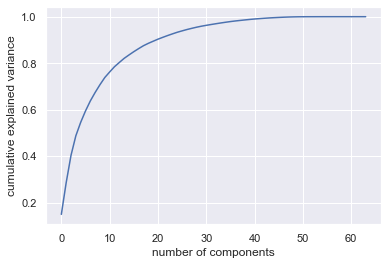

In [29]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### with the digits data

we see that with the digits **the first 10 components contain approximately 75% of the variance**, while you need around 50
components to describe close to 100% of the variance.

our two-dimensional projection loses a lot of information (as measured by the explained variance)

# PCA as Noise Filtering

The idea is this: any **components with variance much larger than the effect of the noise should be relatively
unaffected by the noise**.

So if you **reconstruct the data using just the largest subset of principal components**=** keeping the signal and throwing out the noise.**

## with the digits data

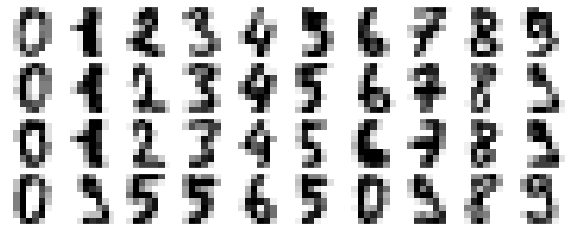

In [32]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),cmap='binary', interpolation='nearest', clim=(0, 16))
plot_digits(digits.data)


these are **Digits without noise**

w let’s **add some random noise** to create a noisy dataset, and replot it

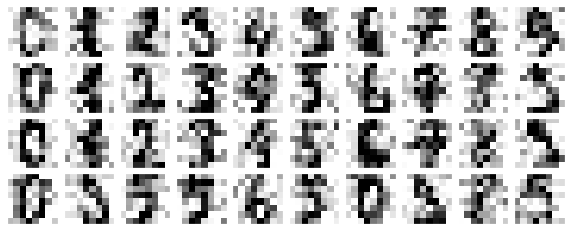

In [33]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

these are **Digits with Gaussian random noise added**

 Let’s **train a PCA on the noisy data**, requesting that the projection **preserve 50% of the variance**:

In [34]:
#se3a 3melna:
#pca = PCA(2) # project from 64 to 2 dimensions
#projected = pca.fit_transform(digits.data)

pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here **50% of the variance amounts to 12 principal components**. Now we **compute these components**, and **then use the inverse of the transform to reconstruct the
filtered digits**

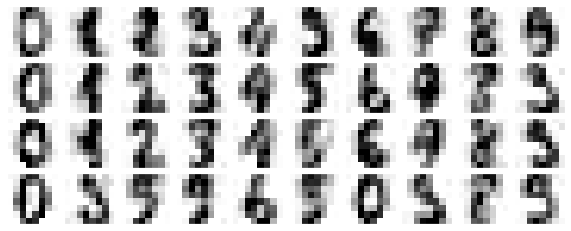

In [35]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# Example: Eigenfaces

In [36]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


**it doesn't work anymore**

this is a large dataset -> we will use **RandomizedPCA** (it contains a randomized method to approximate the first N principal components much **more quickly than the standard PCA estimator**) 
-> is very useful for **high-dimensional data** (here, a dimensionality of
nearly 3,000). We will take a look at the first 150 components:

In [47]:
pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

 we visualize the images associated with the **first several principal components** (these components are technically known as “eigenvectors,” so these types of images are often called “eigenfaces”)

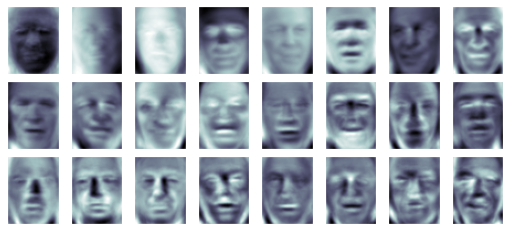

In [43]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

 this gives us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.

we look at the **cumulative variance** of these components to see **how much of the data information the projection is preserving**

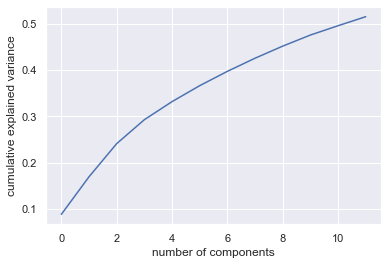

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these **150 components account for just over 90% of the variance**
using these 150 components, we would recover most ofthe essential characteristics of the data.

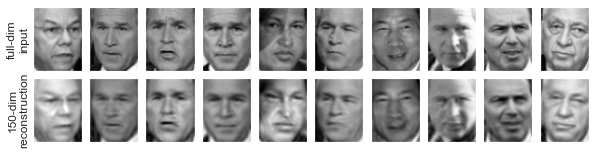

In [45]:
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');


The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features

# Summary

**use of PCA:**

    • dimensionality reduction
    
    • visualization of high-dimensional data
    
    • noise filtering
    
    • feature selection within high-dimensional data.

high-dimensional dataset -> start with PCA to:
    
    • visualize the relationship between points( example digits)
    
    • understand the main variance in the data (eigenfaces)
    
    • understand the intrinsic dimensionality ( plotting the explained variance ratio)

**weakness**

It tends to be highly affected by outliers in the data ->many robust variants of PCA have been developed